# Create a MDAnalysis universe

In [1]:
import numpy as np
import MDAnalysis as mda
import nmrformd as nmrmd

In [2]:
datapath = "./gromacs-inputs/"

In [3]:
u = mda.Universe(datapath+"prod.tpr", datapath+"prod.xtc")

In [4]:
group_H = u.select_atoms("type H*")
group_H_water = u.select_atoms("resname SOL and type H*")
group_H_polymer = u.select_atoms("resname PEG and type H*")

In [5]:
n_water_molecules = group_H_water.n_residues
print(f"The number of water molecules is {n_water_molecules}")
n_polymer_molecules = group_H_polymer.n_residues
print(f"The number of PEG molecules is {n_polymer_molecules}")

The number of water molecules is 334
The number of PEG molecules is 20


# Run NMRforMD

In [15]:
PEG_nmr = nmrmd.NMR(u, group_H_polymer, neighbor_group=group_H) # , number_i=40)
H2O_nmr = nmrmd.NMR(u, group_H_water, neighbor_group=group_H, number_i=120)

# Extract T1

In [16]:
T1_PEG = np.round(PEG_nmr.T1,2)
print(f"NMR relaxation time T1 - PEG = {T1_PEG} s")
T1_H2O = np.round(H2O_nmr.T1,2)
print(f"NMR relaxation time T1 - H2O = {T1_H2O} s")

NMR relaxation time T1 - PEG = 0.65 s
NMR relaxation time T1 - H2O = 0.62 s


# Plot the spectrum

In [17]:
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [18]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
fontsize = 30
font = {'family': 'sans', 'color':  'black', 'weight': 'normal', 'size': fontsize}
myblue = [0/ 255, 150/255, 177/ 255]
myred= [255/ 255, 77/255, 77/ 255]
lightgray = [0.1, 0.1, 0.1]
darkgray = [0.9, 0.9, 0.9]

#### Plot one figure for the light mode, and one figure for the dark mode

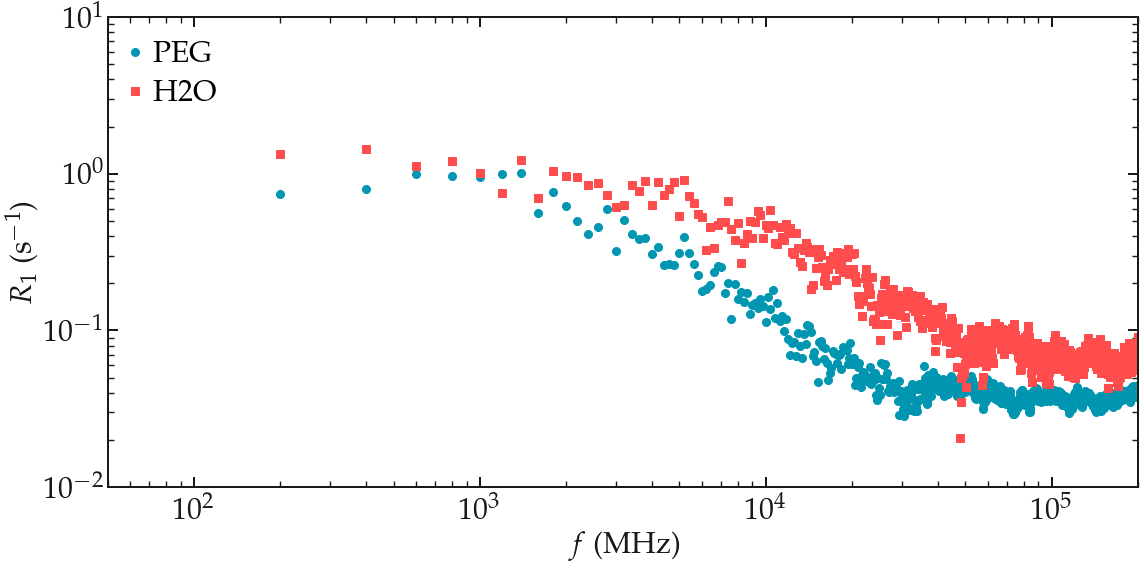

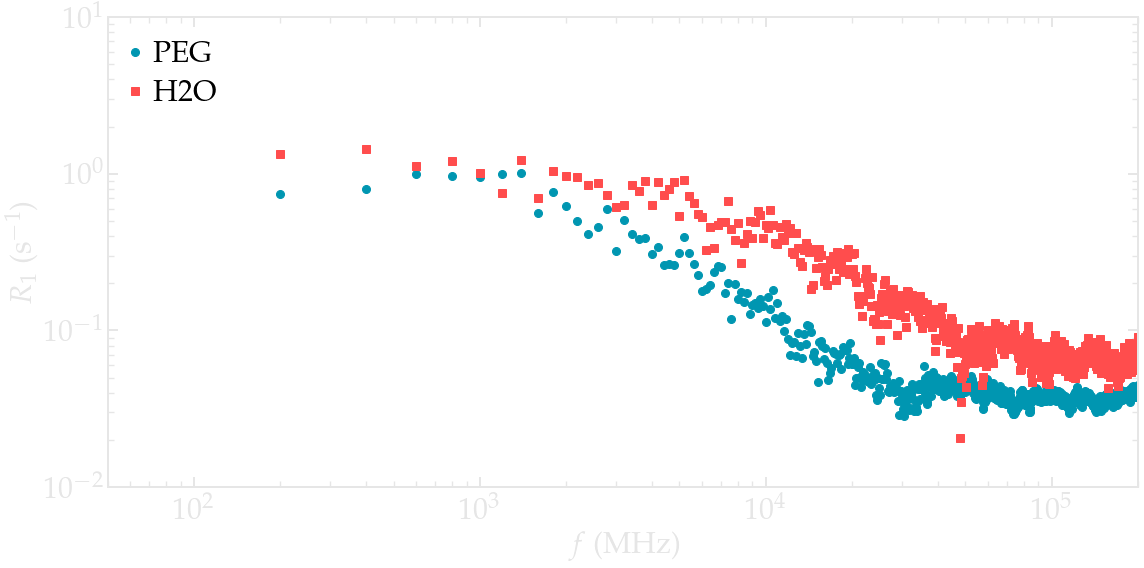

In [25]:
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):

    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(111)
    plt.loglog(PEG_nmr.f[:-60], PEG_nmr.R1[:-60], 'o', markersize=8, color=myblue, label=r'PEG')
    plt.loglog(PEG_nmr.f[:-60], H2O_nmr.R1[:-60], 's', markersize=8, color=myred, label=r'H2O')
    divider = make_axes_locatable(ax1)
    ax1.set_xlabel(r"$f$ (MHz)", fontdict=font)
    ax1.set_ylabel(r'$R_1$ (s$^{-1}$)', fontdict=font)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    #plt.ylim(5, 65)
    ax1.minorticks_on()
    ax1.tick_params('both', length=10, width=2, which='major', direction='in')
    ax1.tick_params('both', length=6, width=1.4, which='minor', direction='in')
    ax1.xaxis.set_ticks_position('both')
    ax1.yaxis.set_ticks_position('both')
    ax1.spines["top"].set_linewidth(2)
    ax1.spines["bottom"].set_linewidth(2)
    ax1.spines["left"].set_linewidth(2)
    ax1.spines["right"].set_linewidth(2)
    #ax1.set_xticks([0, 5, 10, 15, 20])
    #ax1.set_yticks([0, 0.4, 0.8, 1.2, 1.6])
    #minor_locator_y = AutoMinorLocator(2)
    #ax1.yaxis.set_minor_locator(minor_locator_y)
    #minor_locator_x = AutoMinorLocator(2)
    #ax1.xaxis.set_minor_locator(minor_locator_x)
    ax1.xaxis.label.set_color(mygray)
    ax1.yaxis.label.set_color(mygray)
    ax1.tick_params(axis='x', colors=mygray)
    ax1.tick_params(axis='y', colors=mygray)
    ax1.spines['left'].set_color(mygray)
    ax1.spines['top'].set_color(mygray)
    ax1.spines['bottom'].set_color(mygray)
    ax1.spines['right'].set_color(mygray)
    ax1.tick_params(axis='y', which='both', colors=mygray)
    ax1.tick_params(axis='x', which='both', colors=mygray)
    ax1.tick_params(axis='x', pad=10)
    plt.xlim(5e1, 2e5)
    plt.ylim(0.01, 10)

    ax1.legend(frameon=False, fontsize=fontsize, 
            loc='upper left', handletextpad=0.5,
            handlelength = 0.2, borderpad = 0.3, 
            labelspacing=0.3) 

    fig.tight_layout()
    if mode == 'light':
        plt.savefig('figures/R1-light.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)
    else:
        plt.savefig('figures/R1-dark.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)
    plt.show()

# Plot the correlation function

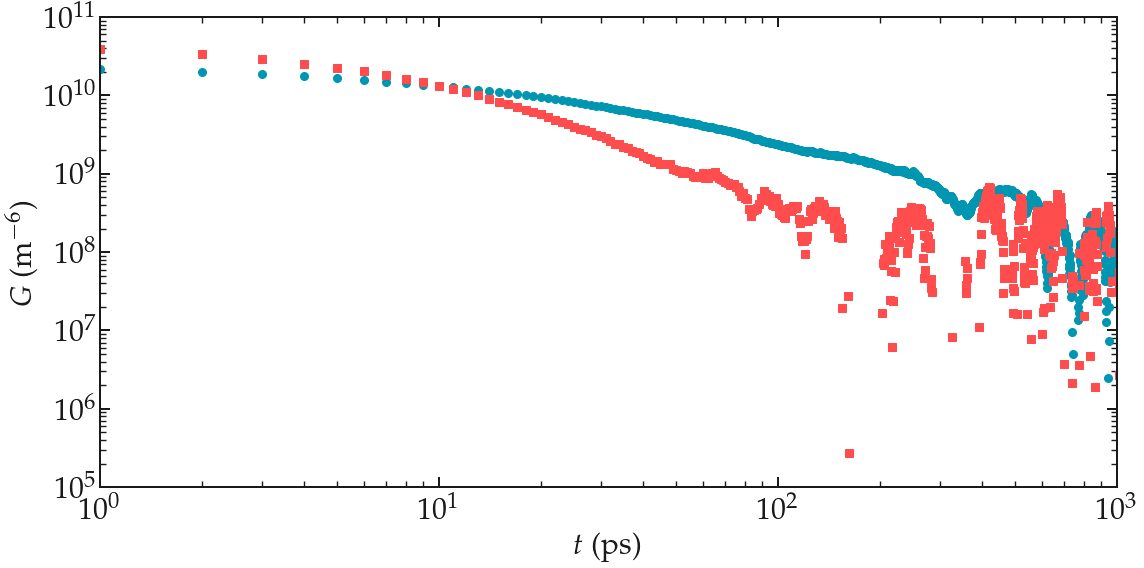

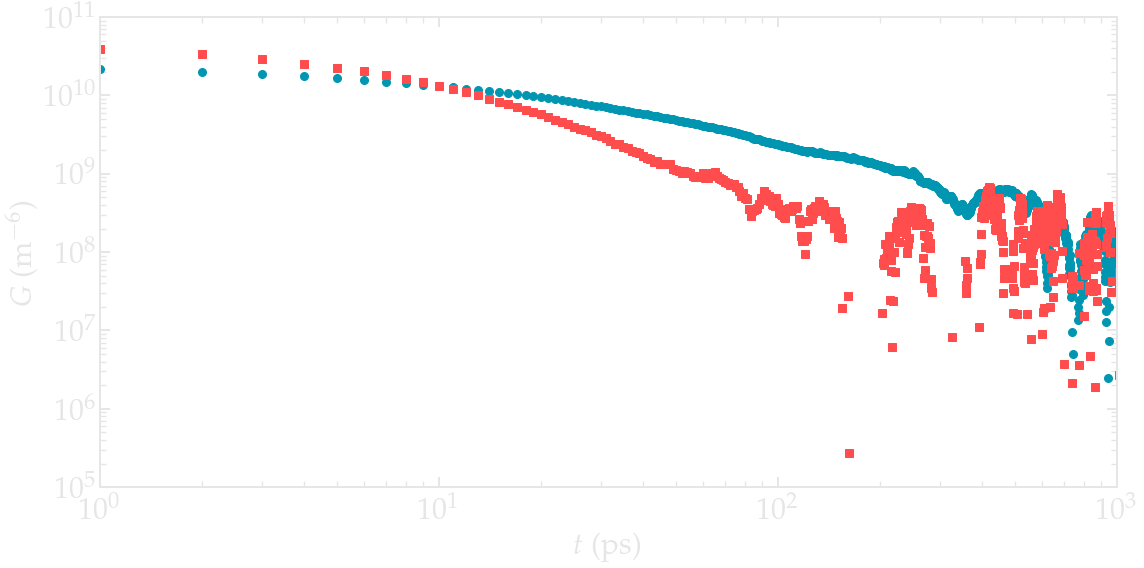

In [28]:
for mode, mygray in zip(['light', 'dark'], [lightgray, darkgray]):

    fig = plt.figure(figsize=(16, 8))
    ax1 = fig.add_subplot(111)
    ax1.loglog(PEG_nmr.t[:-20], PEG_nmr.gij[0][:-20], 'o', markersize=8, color=myblue)
    ax1.loglog(H2O_nmr.t[:-20], H2O_nmr.gij[0][:-20], 's', markersize=8, color=myred)
    divider = make_axes_locatable(ax1)
    ax1.set_xlabel(r"$t$ (ps)", fontdict=font)
    ax1.set_ylabel(r'$G$ (m$^{-6}$)', fontdict=font)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    #plt.ylim(5, 65)
    ax1.minorticks_on()
    ax1.tick_params('both', length=10, width=2, which='major', direction='in')
    ax1.tick_params('both', length=6, width=1.4, which='minor', direction='in')
    ax1.xaxis.set_ticks_position('both')
    ax1.yaxis.set_ticks_position('both')
    ax1.spines["top"].set_linewidth(2)
    ax1.spines["bottom"].set_linewidth(2)
    ax1.spines["left"].set_linewidth(2)
    ax1.spines["right"].set_linewidth(2)
    #ax1.set_xticks([0, 5, 10, 15, 20])
    #ax1.set_yticks([0, 0.4, 0.8, 1.2, 1.6])
    #minor_locator_y = AutoMinorLocator(2)
    #ax1.yaxis.set_minor_locator(minor_locator_y)
    #minor_locator_x = AutoMinorLocator(2)
    #ax1.xaxis.set_minor_locator(minor_locator_x)
    ax1.xaxis.label.set_color(mygray)
    ax1.yaxis.label.set_color(mygray)
    ax1.tick_params(axis='x', colors=mygray)
    ax1.tick_params(axis='y', colors=mygray)
    ax1.spines['left'].set_color(mygray)
    ax1.spines['top'].set_color(mygray)
    ax1.spines['bottom'].set_color(mygray)
    ax1.spines['right'].set_color(mygray)
    ax1.tick_params(axis='y', which='both', colors=mygray)
    ax1.tick_params(axis='x', which='both', colors=mygray)
    ax1.tick_params(axis='x', pad=10)
    plt.xlim(1, 1e3)
    plt.ylim(1e5, 1e11)
    fig.tight_layout()
    if mode == 'light':
        plt.savefig('figures/G-light.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)
    else:
        plt.savefig('figures/G-dark.png', bbox_inches = 'tight', pad_inches = 0.057, transparent=True)
    plt.show()